<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/DLLabp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 2)
print(len(X))

y = (X[:, 0] + X[:, 1] > 1).astype(int).reshape(-1, 1)
print(len(y))

input_size = X.shape[1]
hidden_size = 4
output_size = 1
epochs = 1000
learning_rate = 0.1

100
100


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    bias_hidden = np.zeros((1, hidden_size))
    bias_output = np.zeros((1, output_size))
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

def forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    return hidden_input, hidden_output, final_input, final_output

def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def backward_propagation(X, y_true, hidden_output, final_output, weights_hidden_output):
    output_error = y_true - final_output
    output_delta = output_error * sigmoid_derivative(final_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    return output_delta, hidden_delta

def update_parameters(X, hidden_output, output_delta, hidden_delta,
                      weights_input_hidden, weights_hidden_output,
                      bias_hidden, bias_output, learning_rate):
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

def train_neural_network(X, y, input_size, hidden_size, output_size, epochs, learning_rate):
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):

        hidden_input, hidden_output, final_input, final_output = forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)

        output_delta, hidden_delta = backward_propagation(X, y, hidden_output, final_output, weights_hidden_output)

        weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = update_parameters(X, hidden_output, output_delta, hidden_delta,
                                                                                                  weights_input_hidden, weights_hidden_output,
                                                                                                  bias_hidden, bias_output, learning_rate)

        loss = calculate_loss(y, final_output)
        loss_history.append(loss)

        predictions = (final_output >= 0.5).astype(int)
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}, Accuracy: {accuracy}")

    return loss_history, accuracy_history

In [ ]:
loss_history, accuracy_history = train_neural_network(X, y, input_size, hidden_size, output_size, epochs, learning_rate)

Epoch 0/1000, Loss: 0.3731133518832298, Accuracy: 0.43
Epoch 100/1000, Loss: 0.04669431918651938, Accuracy: 0.95
Epoch 200/1000, Loss: 0.02941050863061217, Accuracy: 0.96
Epoch 300/1000, Loss: 0.023924436820162775, Accuracy: 0.98
Epoch 400/1000, Loss: 0.02088035091063063, Accuracy: 0.98
Epoch 500/1000, Loss: 0.01882260140842255, Accuracy: 0.98
Epoch 600/1000, Loss: 0.017295664131041395, Accuracy: 0.98
Epoch 700/1000, Loss: 0.016101755581737244, Accuracy: 0.98
Epoch 800/1000, Loss: 0.015136618730919196, Accuracy: 0.98
Epoch 900/1000, Loss: 0.014337942370985195, Accuracy: 0.98


Text(0, 0.5, 'Loss')

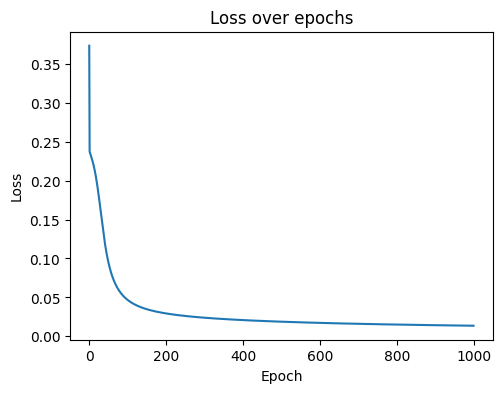

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

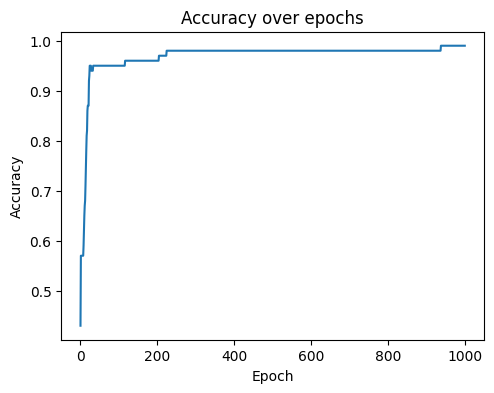

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy_history)
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
